In [16]:
import torch
import matplotlib.pyplot as plt

In [17]:
# Data
X = torch.tensor([-1,0.3,2])
y = torch.tensor([-0.1,0.5,0.5])[None,:]

# insert 1 for the bias
X = torch.stack((torch.ones(size = (3,) ),X))
# initialize weights
w = torch.tensor([-0.45, 0.2])[:,None]

# Normal Batch Gradient Descent

Error at Epoch 0: 0.23284997045993805
Error at Epoch 1: 0.14446280896663666
Error at Epoch 2: 0.09676901251077652
Error at Epoch 3: 0.06870503723621368
Error at Epoch 4: 0.0510203093290329
Error at Epoch 5: 0.03933573514223099
Error at Epoch 6: 0.031382761895656586
Error at Epoch 7: 0.02587401121854782
Error at Epoch 8: 0.02202014811336994
Error at Epoch 9: 0.019309068098664284
Error at Epoch 10: 0.01739611104130745
Error at Epoch 11: 0.016044067218899727
Error at Epoch 12: 0.0150876110419631
Error at Epoch 13: 0.014410664327442646
Error at Epoch 14: 0.013931423425674438
Error at Epoch 15: 0.013592095114290714
Error at Epoch 16: 0.01335181575268507
Error at Epoch 17: 0.013181663118302822
Error at Epoch 18: 0.013061168603599072
Error at Epoch 19: 0.012975840829312801
Error at Epoch 20: 0.0129154147580266
Error at Epoch 21: 0.012872620485723019
Error at Epoch 22: 0.012842316180467606
Error at Epoch 23: 0.012820854783058167
Error at Epoch 24: 0.012805658392608166
Error at Epoch 25: 0.0127

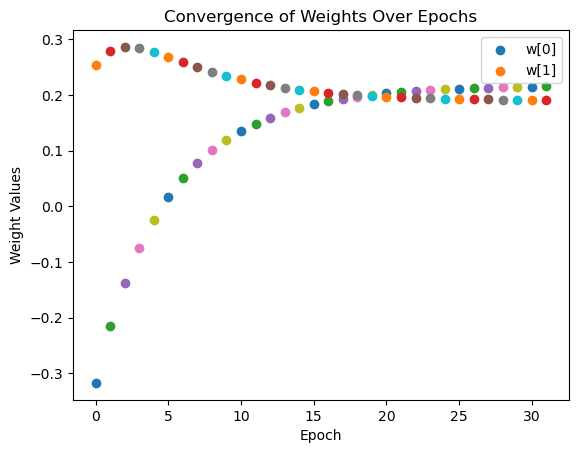

In [18]:
%matplotlib inline

def gradient_descent_linear_regression(X, y, delta=0.2, p=3, epochs=100,tol=1e-6):
    """
    Performs gradient descent optimization on a linear regression model.
    
    Parameters:
    - X: torch.Tensor, the input features matrix.
    - y: torch.Tensor, the target values vector.
    - delta: float, the learning rate.
    - p: int, scaling factor for the loss calculation.
    - epochs: int, number of iterations to perform.
    
    The function iteratively updates the weight vector 'w' to minimize
    the squared L2 norm of the prediction error, visualizing the weights'
    convergence process over the epochs.
    """
    
    w = torch.tensor([-0.45, 0.2])[:, None]
    w.requires_grad_(True)
    prev_loss = float('inf')

    for epoch in range(epochs):
        if w.grad is not None:
            w.grad.zero_()
        y_pred = X.T @ w
        loss = ((torch.linalg.vector_norm((y_pred - y.T), ord=2)) ** 2) * 0.5 * 1 / p
        print(f'Error at Epoch {epoch}: {loss}')

        if abs(prev_loss - loss) < tol:
            print(f'Convergence reached at epoch {epoch}.')
            break
            
        prev_loss = loss

        loss.backward()
        with torch.no_grad():
            w -= delta * w.grad

        plt.scatter(epoch, w.detach()[0], label='w[0]' if epoch == 0 else "")
        plt.scatter(epoch, w.detach()[1], label='w[1]' if epoch == 0 else "")

    plt.xlabel('Epoch')
    plt.ylabel('Weight Values')
    plt.title('Convergence of Weights Over Epochs')
    plt.legend()
    plt.show()
    return
    
gradient_descent_linear_regression(X, y, delta=0.2, p=3, epochs=100)

# Line Search Gradient Descent

Error at Epoch 0: 0.049866098910570145
Error at Epoch 1: 0.019021974876523018
Error at Epoch 2: 0.01382282841950655
Error at Epoch 3: 0.012946450151503086
Error at Epoch 4: 0.012798725627362728
Error at Epoch 5: 0.012773826718330383
Error at Epoch 6: 0.01276963111013174
Error at Epoch 7: 0.012768920511007309
Convergence reached at epoch 7.


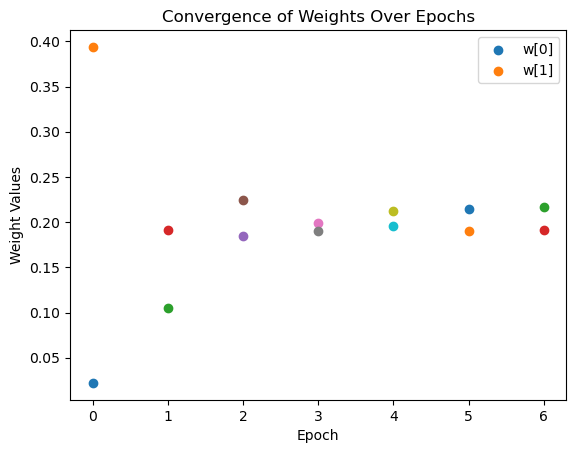

In [19]:
%matplotlib inline

def line_search_gradient_descent(X, y, p=3, epochs=100, tol=1e-6):
    """
    Performs line search gradient descent optimization on a linear regression model with early stopping.
    
    Parameters:
    - X: torch.Tensor, input features matrix.
    - y: torch.Tensor, target values vector.
    - p: int, scaling factor for loss calculation.
    - epochs: int, number of iterations to perform.
    - tol: float, tolerance for early stopping based on change in loss.
    
    Outputs a plot of the weight components' values over the epochs, demonstrating their convergence behavior.
    """
    w = torch.tensor([-0.45, 0.2])[:, None]
    prev_loss = float('inf')
    
    for epoch in range(epochs):
        g_t = (1/p * X @ X.T @ w - 1/p * X @ y.T)
        step_size = ((g_t.T @ g_t) / (g_t.T @ (1/p * X @ X.T) @ g_t + 1e-8))
        w -= step_size * g_t

        y_pred = X.T @ w
        loss = ((torch.linalg.vector_norm((y_pred - y.T), ord=2)) ** 2) * 0.5 * 1 / p
        print(f'Error at Epoch {epoch}: {loss}')

        if abs(prev_loss - loss) < tol:
            print(f'Convergence reached at epoch {epoch}.')
            break
        prev_loss = loss

        plt.scatter(epoch, w[0], label='w[0]' if epoch == 0 else "")
        plt.scatter(epoch, w[1], label='w[1]' if epoch == 0 else "")

    plt.xlabel('Epoch')
    plt.ylabel('Weight Values')
    plt.title('Convergence of Weights Over Epochs')
    plt.legend()
    plt.show()
line_search_gradient_descent(X, y, p=3, epochs=100)